In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Mar 12 01:35:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
%cd /content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8
/content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

#Download a Dataset

Add your Roboflow API key below to download the default money counting dataset. Alternatively, use the code provided by the Roboflow dashboard in the above step to load a custom dataset.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="73O3fuIyBQR4AYKZdinh")
project = rf.workspace("tcc1").project("scattered-letters-dataset")
version = project.version(1)
dataset = version.download("yolov8")

/content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Scattered-Letters-Dataset-1 in yolov8:: 100%|██████████| 1049/1049 [00:08<00:00, 126.41it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=500 imgsz=640 plots=True

/content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8
100% 21.5M/21.5M [00:00<00:00, 135MB/s] 
New https://pypi.org/project/ultralytics/8.1.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8/datasets/Scattered-Letters-Dataset-1/data.yaml, epochs=500, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False,

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      val_batch0_labels.jpg
confusion_matrix.png				    R_curve.png       val_batch0_pred.jpg
events.out.tfevents.1710207554.04a934be2823.4691.0  results.csv       val_batch1_labels.jpg
F1_curve.png					    results.png       val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights
labels.jpg					    train_batch1.jpg


/content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8


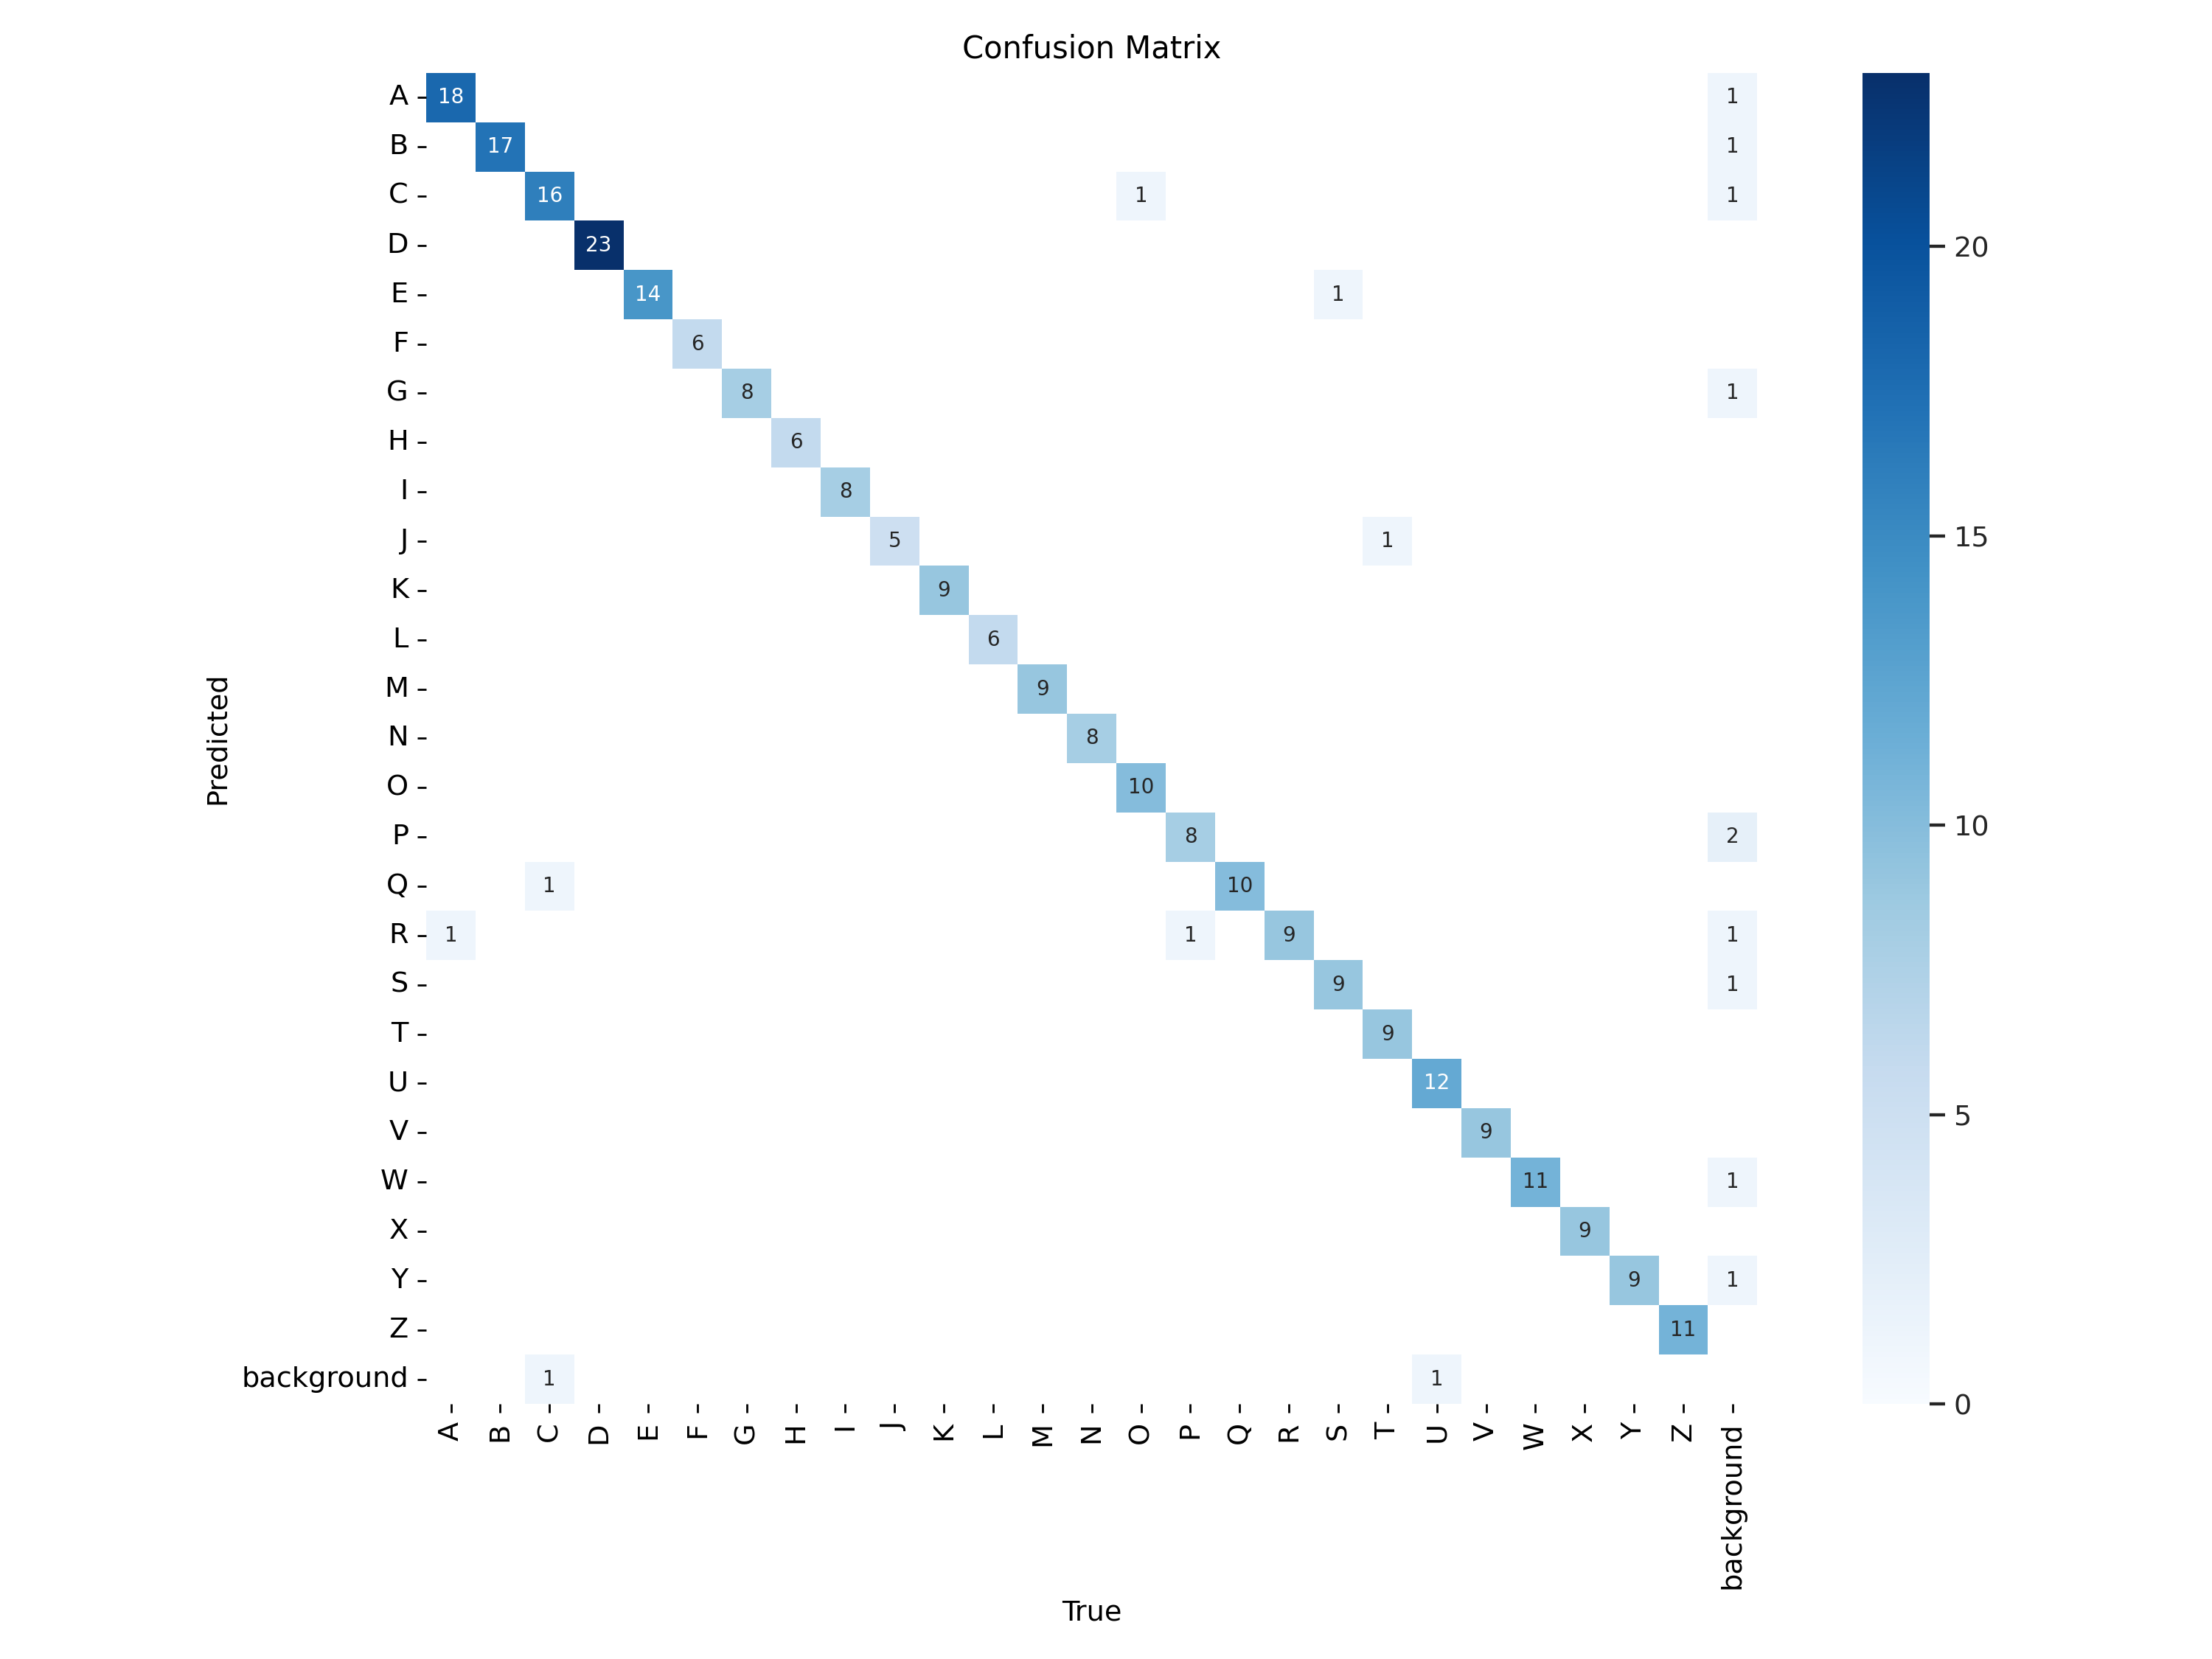

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8


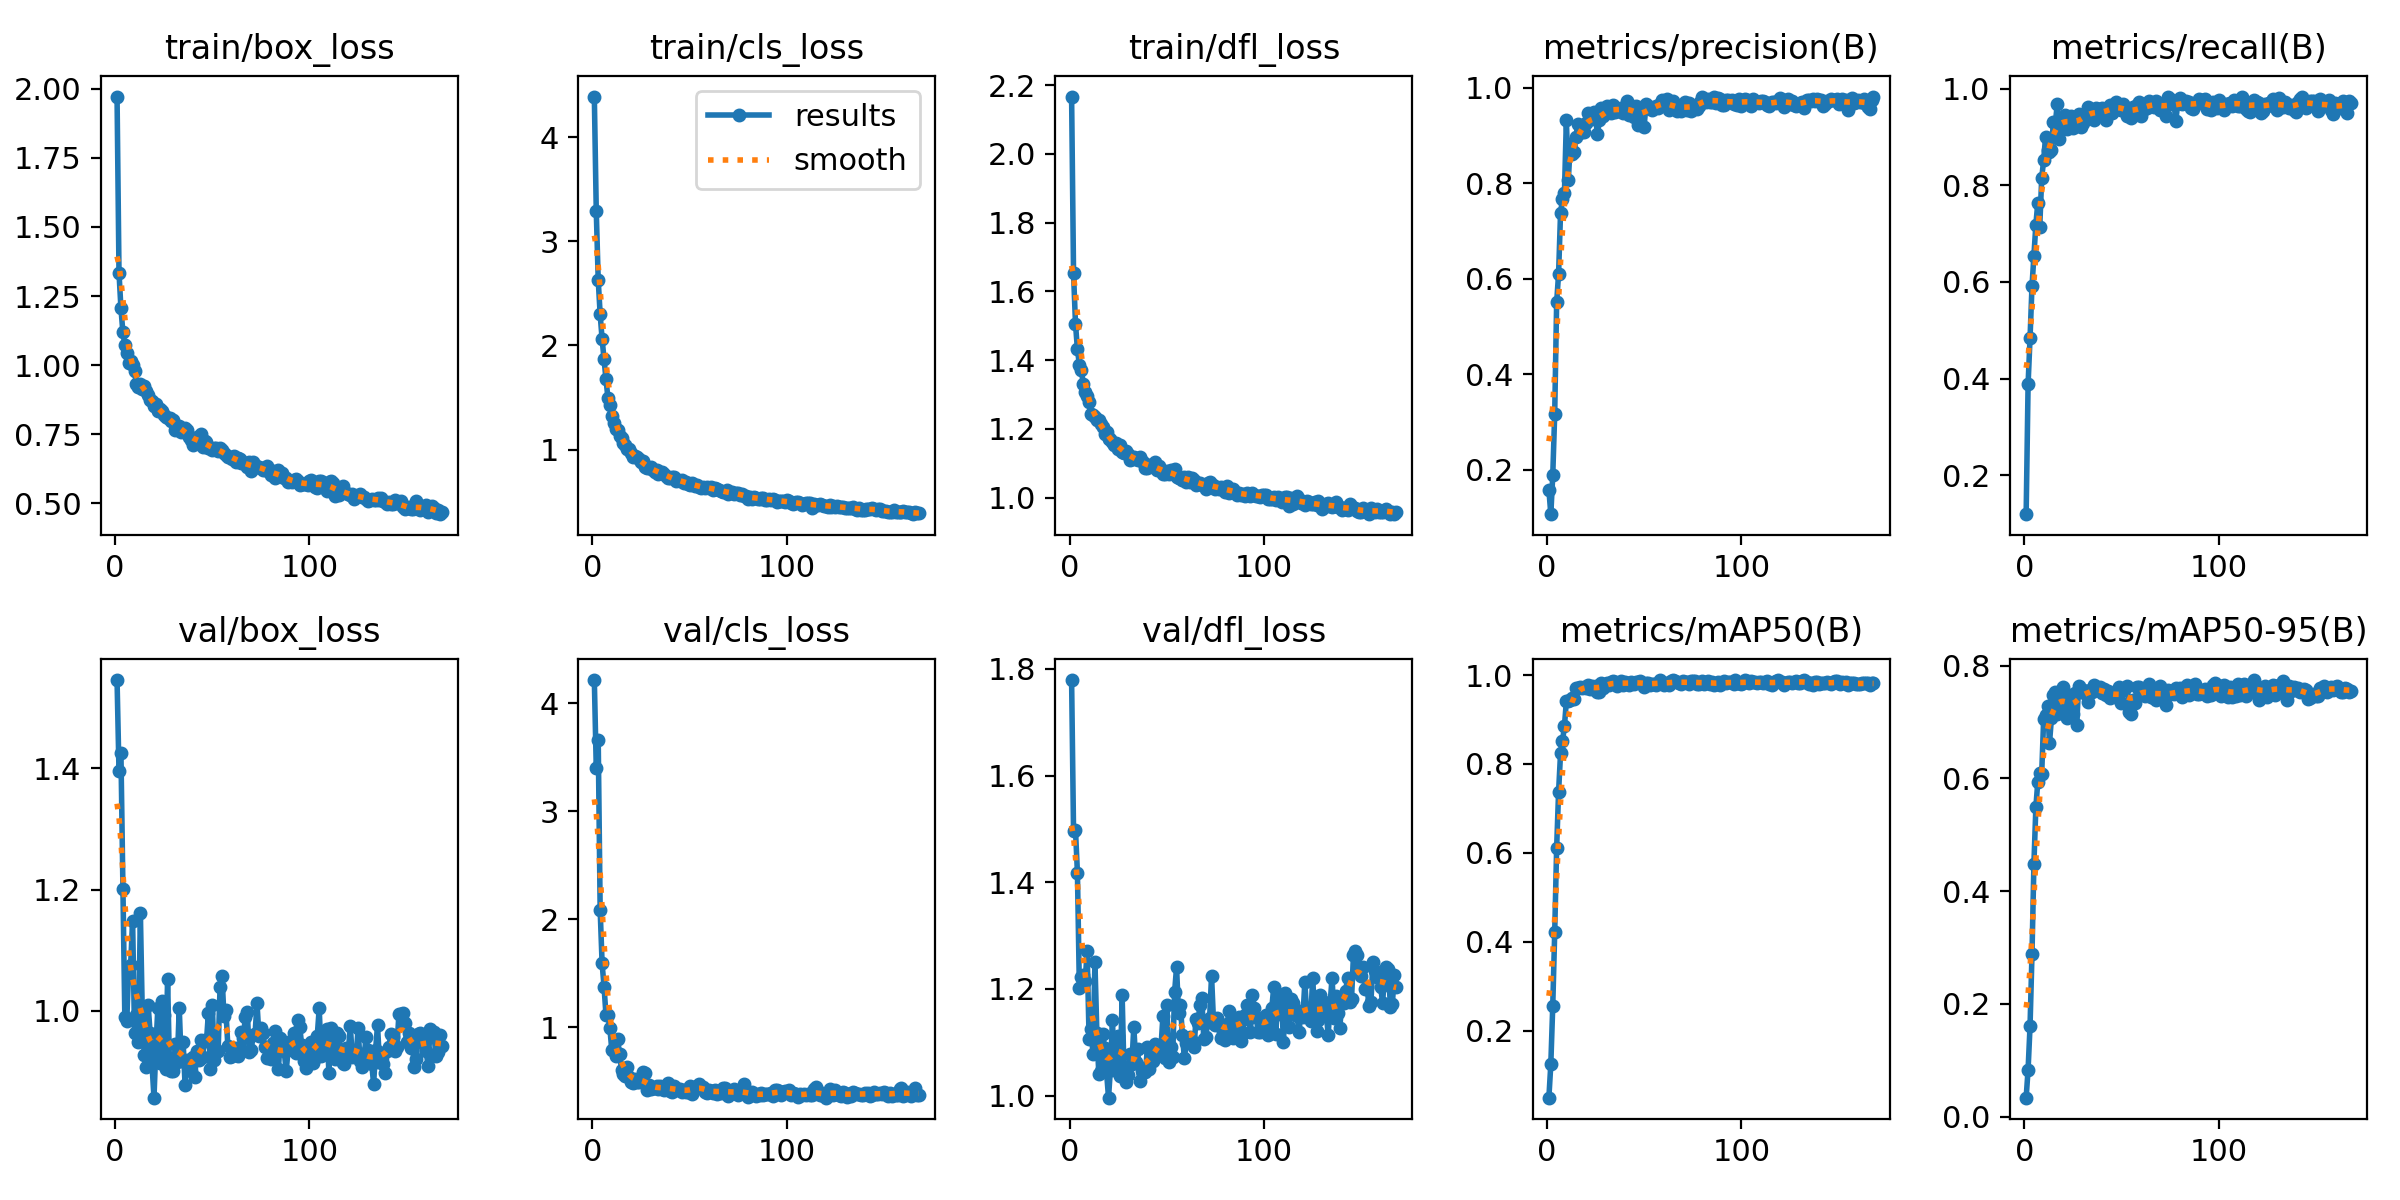

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

/content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8


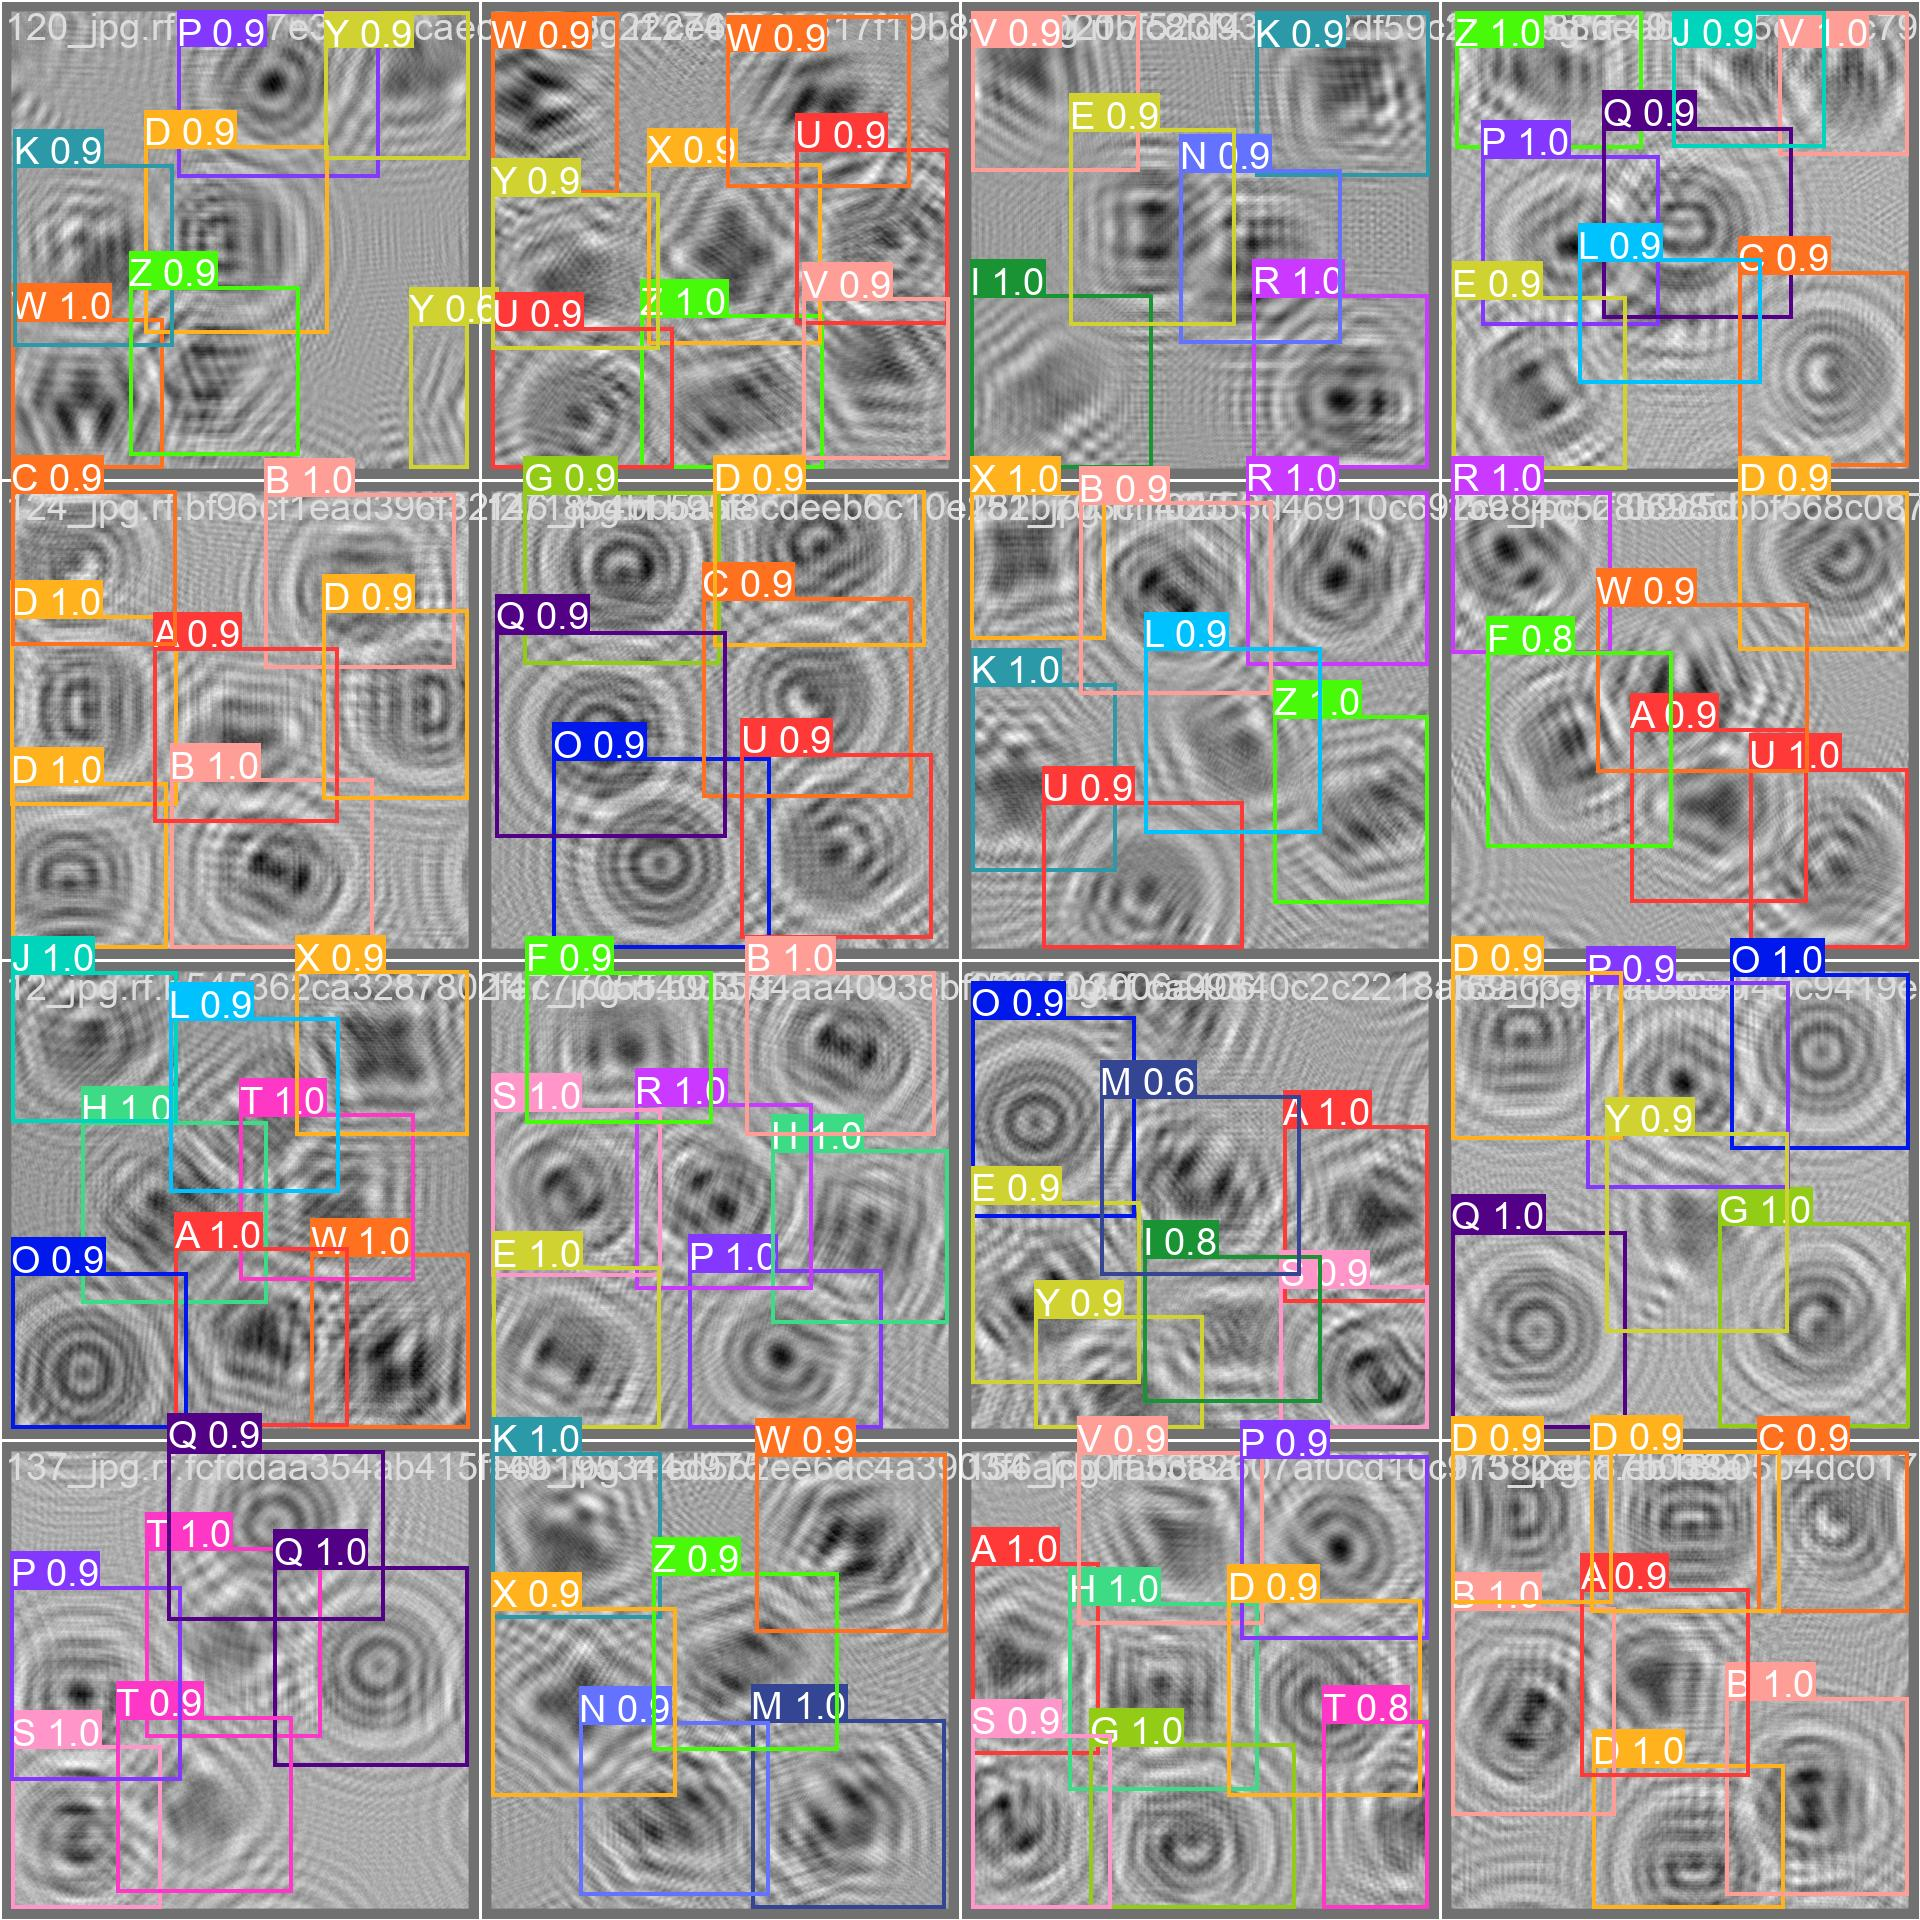

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=900)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8/datasets/Scattered-Letters-Dataset-1/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:05<00:00,  1.76s/it]
                   all         40        277      0.968      0.977      0.986      0.774
                     A         40         19          1      0.945      0.971      0.698
                     B         40         17      0.994          1      0.995      0.821
                     C         40         18      0.941       0.89      0.943      0.737
                     D         40         23      0.994          1      0.995        0.8
              

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/valid/images save=True

/content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/40 /content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8/datasets/Scattered-Letters-Dataset-1/valid/images/120_jpg.rf.115b7e3b755caec82b48c22274762a3a.jpg: 640x640 1 D, 1 K, 1 P, 1 W, 3 Ys, 1 Z, 16.4ms
image 2/40 /content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8/datasets/Scattered-Letters-Dataset-1/valid/images/124_jpg.rf.bf96cf1ead396f32f271854bb5aaeb26.jpg: 640x640 1 A, 2 Bs, 3 Cs, 3 Ds, 16.7ms
image 3/40 /content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8/datasets/Scattered-Letters-Dataset-1/valid/images/12_jpg.rf.b545362ca3287802fac7705540d37fb5.jpg: 640x640 1 A, 1 H, 1 J, 1 L, 2 Os, 1 T, 1 W, 1 X, 16.3ms
image 4/40 /content/drive/MyDrive/ColabNotebooks/ObjDetect_YOLOv8/datasets/Scattered-Letters-Datase

**NOTE:** Let's take a look at few results.

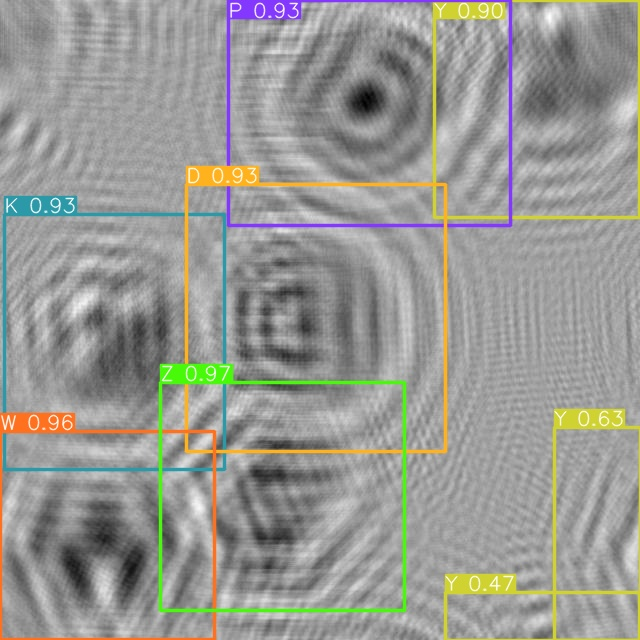

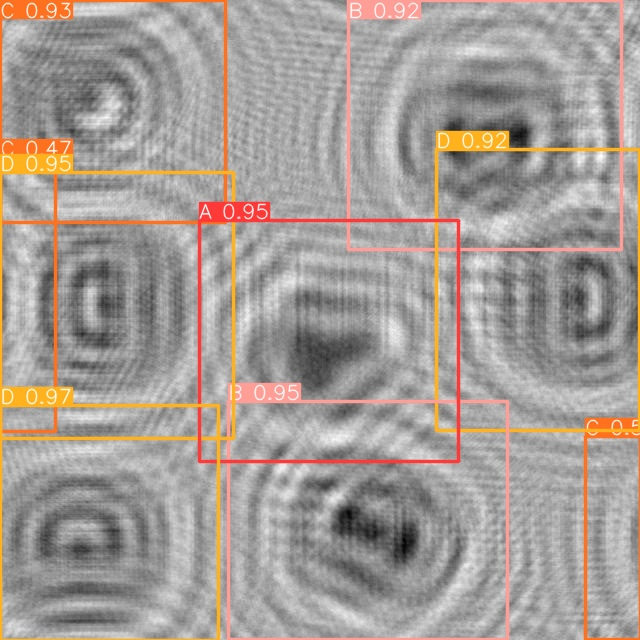

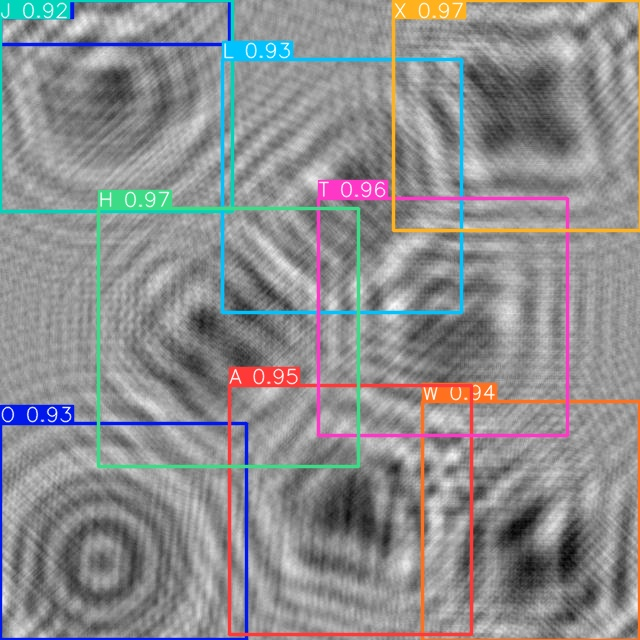

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")